# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

In [1]:
# C2054492

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [2]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# add more imports here if you like
# ...

In [3]:
# change this line your folder where the data is found
basedir = ''

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [4]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [5]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


## Question 1a

In [6]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
    """
    Drop all columns specified columns. Take dataframe as an input
    

    Returns:
        dataframe witout specified columns
    """
    df = df.drop(['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about', 'host_location','host_total_listings_count','host_thumbnail_url','host_picture_url', 'host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],1)
    print(len(df.columns))
    return df

In [7]:
df = drop_cols(df)
df.columns

45


Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [8]:
def drop_cols_na(df, threshold):
  """
    Drop all columns with more nan values than threshold
    
    Take dataframe as an input

    Returns:
        dataframe witout specified columns
    """
  arr = []
  for i in range (0,len(df.isnull().sum())):
        #print(df.isnull().sum()[i])
        #print(len(df))
      complete = len(df) - df.isnull().sum()[i]
      rate = complete / len(df) 
      if rate < threshold/100:
          arr.append(i)
  print(arr)    
  df = df.drop(df.columns[arr], axis=1)
  return df

In [9]:
df = drop_cols_na(df, 0.5)

[14, 20, 26, 42]


In [10]:
len(df.columns)

41

## Question 1b

In [11]:
def binary_encoding(df):
    """
    Change t values to 1
    
    Change f values to 0
    
    Take dataframe as an input

    Returns:
        dataframe with binary encoding
    """
    for i in df.columns:
        for j in range(0, len(df[i])):
            if df[i][j] == "t":
                df[i][j] = 1
            elif df[i][j] == "f":
                df[i][j] = 0
    return df

In [12]:
df = binary_encoding(df)

<ipython-input-11-64d113c78e43>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 1
<ipython-input-11-64d113c78e43>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 0


In [13]:
# hint: check Pandas to_datetime method
from datetime import date
from datetime import datetime
def add_host_days(df):
    """
    Add host_days feature. There is host_since feature and use it to find total days after host registered.
    
    There is 55 nan values in host_days column and I prefered to drop them.

    Returns:
        dataframe with host_days feature
    """

    arr = []
    df = df[df['host_since'].notna()].reset_index() 
    df["host_days"] = 0
    today = date.today()
    df['host_since'] = pd.to_datetime(df['host_since'])
    df = df[df['host_since'].notna()].reset_index() 
    
    for i in range(0,len(df)):
        arr.append((today - df.host_since[i].date()).days)
    df.host_days = arr

    return df

In [14]:
def convert_price(df):
    """
    Convert price, add unnecessary chars and make it clean

    Returns:
        dataframe
    """
    for i in range (0,len(df["price"])):
        df["price"][i] = float(df["price"][i][1:].replace(",",""))
    return df

In [15]:
df = add_host_days(df)

In [16]:
df = convert_price(df)

<ipython-input-14-7c9d1df9381d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"][i] = float(df["price"][i][1:].replace(",",""))


## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [17]:
# How many hosts offer 2 or more properties for rent?
df_host = df.host_name.value_counts().to_dict()
df_host = {name: offer for name, offer in df_host.items() if offer > 1}
df_host_list_more_than_1 = list(df_host.keys())
len(df_host_list_more_than_1)

2149

In [18]:
# What is the highest price for a listing?
max(df.price)

8000.0

In [19]:
df[df.price == 8000.0]

,level_0,index,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
88,88,88,258273,Great CENTRAL apartment De Pijp,1358307,Peter,2011-11-01,NaN,NaN,NaN,...,72.0,8.0,6.0,9.0,9.0,9.0,8.0,0,0.08,3510
10943,10943,10972,21946106,Modern appartment with canal view in city center,12583042,Jacqueline,2014-02-25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.03,2663


In [20]:
# What is the ID of the listing that has the largest number of bedrooms?
max(df.bedrooms)
idxmax = df.bedrooms.idxmax()
print("ID of the largest number of bedrooms: {}".format(df.iloc[idxmax].id))

ID of the largest number of bedrooms: 46015289


In [21]:
# What is the ID of the listing with the largest advertised price
df.price = pd.to_numeric(df['price'])
idmax = df.price.idxmax()
print("ID of the largest advertised price: {}".format(df.iloc[idmax].id))

ID of the largest advertised price: 258273


In [22]:
# There are different room types. How many listings are there for the most common room type?
max_listing_room_type = max(df.room_type.value_counts().to_dict().values())
print("Most common room-type listing number: {}".format(max_listing_room_type))

Most common room-type listing number: 14379


In [23]:
# How many hosts are there that have been registered for more than 3000 days?
print("Hosts have been registered for more than 3000 days: {}".format(len(df[df.host_days > 3000])))

Hosts have been registered for more than 3000 days: 2835


## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

<AxesSubplot:xlabel='price', ylabel='neighbourhood_cleansed'>

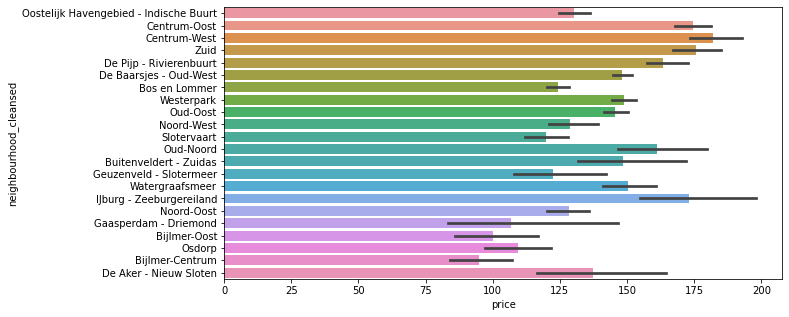

In [24]:
neighbourhood_list = df.neighbourhood_cleansed.unique()
plt.figure(figsize=(10,5))
sns.barplot(x = "price", y = "neighbourhood_cleansed", data= df)

Plot a correlation matrix as instructed in the Coursework proforma:

<AxesSubplot:>

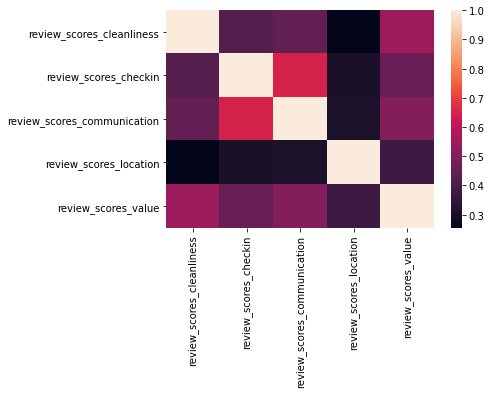

In [25]:
df_rev = df.iloc[:,36:41]
corr = df_rev.corr()
sns.heatmap(corr)

Plot a geographical distribution as instructed in the Coursework proforma:

In [26]:
!pip install chart_studio

In [27]:
df_price_150 = df[df.price > 150].reset_index(drop=True)
df_price_150.price = pd.to_numeric(df_price_150['price'])

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [28]:
df_price_150["color"] = 0

price_arr = list(df_price_150.price)
color_arr = []

for i in range(0,len(price_arr)):
    
    if price_arr[i] >= 150 and price_arr[i] < 300:
        color_arr.append(150)
    elif price_arr[i] >= 300 and price_arr[i] < 450:
        color_arr.append(300)
    elif price_arr[i] >= 450 and price_arr[i] < 600:
        color_arr.append(450)
    elif price_arr[i] >= 600 and price_arr[i] < 750:
        color_arr.append(600)
    elif price_arr[i] >= 750:
        color_arr.append(750)
        
df_price_150.color = color_arr

In [29]:
import plotly.express as px
fig = px.scatter(df_price_150, y = "latitude", x = "longitude", size = "price", color = "price", hover_data=["price"])
fig.show()

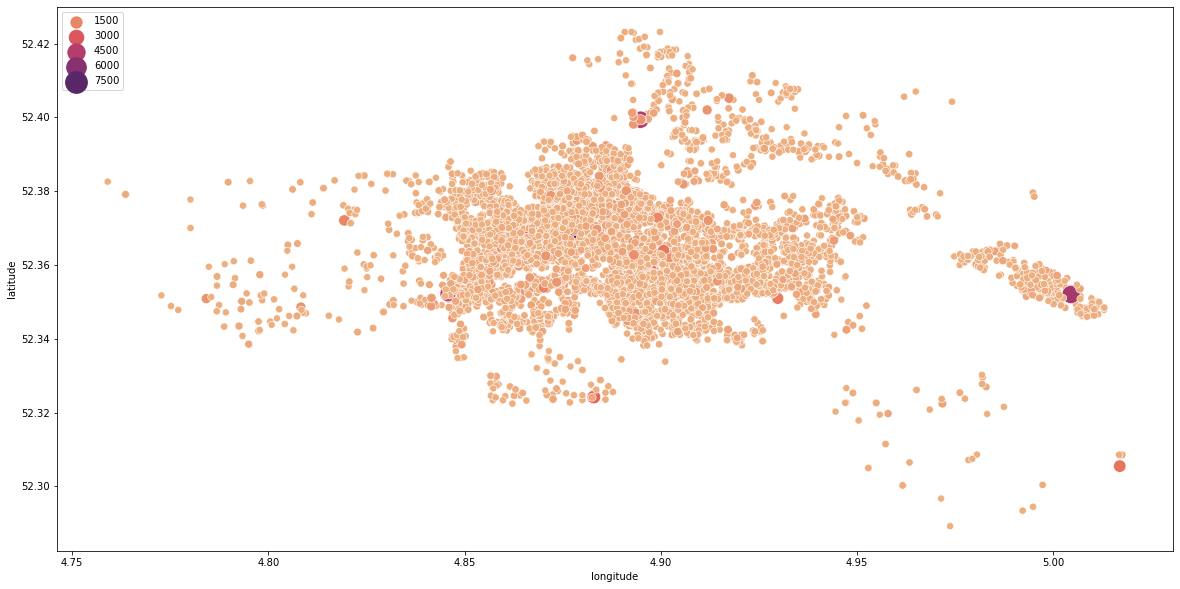

In [30]:
f,ax = plt.subplots(figsize = (20,10))

df_150 = df[df["price"] > 150]

sns.scatterplot(x="longitude", y="latitude", data=df_150,  hue="price",palette = "flare", size="price", sizes = (50,500))
plt.legend(loc='upper left')
plt.show()

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [31]:
df_review = df.iloc[:,34:41]   # select the relayed columns
df_review = df_review.dropna()  # almost 15% is nan value so drop them all
# change columns name
df_review.columns = ["overall_rating","accuracy", "cleanliness", "checkin", "communication", "location", "value"]
df_review.head()

,overall_rating,accuracy,cleanliness,checkin,communication,location,value
0,98.0,10.0,10.0,10.0,10.0,9.0,10.0
1,89.0,10.0,10.0,10.0,10.0,10.0,9.0
2,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3,99.0,10.0,10.0,10.0,10.0,10.0,10.0
4,97.0,10.0,10.0,10.0,10.0,10.0,10.0


In [32]:
import statsmodels.api as sm

In [33]:
# linear regression with Ordinary least squares / stat
fit = sm.OLS.from_formula('overall_rating ~ accuracy + cleanliness + checkin + communication + location + value', df_review).fit()

In [34]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     6996.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:13:28   Log-Likelihood:                -42822.
No. Observations:               15831   AIC:                         8.566e+04
Df Residuals:                   15824   BIC:                         8.571e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2997      0.550     -0.545

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): ...[double click to edit]...

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): ...


In [35]:
# extract prices for all room types

price_private = df[df.room_type == 'Private room'].price
price_home = df[df.room_type == 'Entire home/apt'].price
price_hotel = df[df.room_type == 'Hotel room'].price
price_shared = df[df.room_type == 'Shared room'].price

In [36]:
from scipy.stats import ttest_ind
from scipy.stats import t

In [37]:
print(price_private.mean())
print(price_home.mean())
print(price_hotel.mean())
print(price_shared.mean())

93.70834403080873
170.70454899506225
131.75177304964538
105.0


In [38]:
arr = [price_private, price_home, price_hotel, price_shared]  # put all room_type prices in arr for iteration
names = ["price_private", "price_home", "price_hotel", "price_shared"] # all names of room_types

p_value_df = pd.DataFrame(index= names, columns= names)  # define null df

for i,j in zip(arr,names):    # fill dataframe with p values
    for a,b in zip(arr,names):
        t_stat, p = ttest_ind(i, a)  # calculate p values and put it in dataframe 
        p_value_df.at[j, b] = p
        
p_value_df



,price_private,price_home,price_hotel,price_shared
price_private,1,1.00173e-183,5.96164e-05,0.451488
price_home,1.00173e-183,1,0.00294736,0.00220037
price_hotel,5.96164e-05,0.00294736,1,0.312119
price_shared,0.451488,0.00220037,0.312119,1


In [39]:
#There are 6 unique hypotesis in total. 

#This is why as a definifion of Bonferroni, we should divide p value / 6.

unique_hypothesis_number = 6

alpha = 0.01 

Bonferroni_alpha = alpha / unique_hypothesis_number


* According to alpha = 0.01 threshold, As we can see in the table;

1- Private room ~ Entire home/apt

2- Private room ~ Hotel room

3- Hotel room ~ Entire home/apt

4- Shared room ~ Entire home/apt

The price of these room_type pair are significantly different.

In [40]:
Bonferroni_alpha

0.0016666666666666668

* If we change alpha with Bonferroni_alpha this time;

1- Hotel room ~ Private room

2- Entire home/apt ~ Private room

these price pairs are significantly different according to Bonferroni_alpha

## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: ...

In [41]:
def variable_selection(df, predictors, target, alpha):
    """
    Find significant variables. To to that we will use r2 and p values. 
    
    Room type is a categorical so apply get_dummies. It is like a onehot encoder.
    
    First: Rsquare value should be calculate one by one and take the feature with highest r2 value,
    
    add it in an arry to collect and do same process now make ols with first collected value and other 
    
    variable comes from predictors. Iterate this process until the columns left dont give 
    
    contibution to increase r2 value
    
    Second: Now take the all significant predictors comes from r2 selector and extract values which have bigger p value.
    
    If all p values are lower than alpha than features left are most significant variables
    
    Take dataframe as an input

    Returns:
        the array of significant features
    """
    df.fillna(value = df[predictors].mean(), inplace = True)
    
    
    df_ols = pd.get_dummies(df[predictors], columns=['room_type'])
    predictors = df_ols.columns.values.tolist()
    df_ols_target = df[target]
    print(predictors)
    arr = [] # we will store elements with highest r2 in this arr
    counter = 0 # define counter to escape while loop

    while counter < len(df_ols.columns): # iterate over length of features
      counter = counter + 1. 
      r2_value = 0   # we will store highest r2 value in here so start with 0
      best_predictor = ""  # we will store name of feature with highest r2 value in here
      for i in predictors:
        arrx = []       # every time we create a array with feature comes from for loop
        arrx.append(i)
        arrx = arrx + arr  # merge it with array
        ols = sm.OLS(df_ols_target.price, df_ols[arrx]).fit()   # calculate ols
        r2 = ols.rsquared # calculate r2

        if r2 > r2_value: #if current r2 is bigger than previous our new biggest r2_value is our current r2 so change it and also take the feature name
          r2_value = r2
          best_predictor = i
        else:   # if previous is bigger than current, do nothing it means current feature didnt contribute more to increase r2 value like previous feature
          r2_value = r2_value
          best_predictor = best_predictor
      predictors.remove(best_predictor) # after all iteration we found best feature which is more effective to increase r2 value remove it to predictors because we already analized it.

      if counter > 1:    # in the cell below I calculate ols.r2 but if counter < 1, arr is null so  df_ols[arr] will give error to protect it i write a conditional if loop.
        calc_r2_1 = sm.OLS(df_ols_target.price, df_ols[arr]).fit().rsquared # previous r2
        arr.append(best_predictor)
        calc_r2_2 = sm.OLS(df_ols_target.price, df_ols[arr]).fit().rsquared # current r2
        
        if calc_r2_1 > calc_r2_2:   # if current r2 lower than previous than feature decrease the r2 score so break the function
          arr = arr[:-1]
          break
        else:
          arr = arr
      else:   # if counter < 0 , then our r2 value is 0 so, there is no need to compare.
        arr.append(best_predictor)
        #print(sm.OLS(df_ols_target.price, df_ols[arr]).fit().rsquared)

    #print(arr) # print all effective features
    
    
    ### SELECTION BASED ON P VALUE ####################
    
    counter = 0
    alpha = 0.01

    while counter < len(arr):  # iterate 0 to length of features
      #print(predictors)
      counter = counter +1 # define counter to escape loop
      a = sm.OLS(df_ols_target.price, df_ols[arr]).fit() # calculate ols
      dic = a.pvalues.to_dict() # take all p values of features and convert this to dictionary
      if max(dic.values()) > alpha:      # if there is a value over than value of alpha then start reducing operation
        dic = a.pvalues.to_dict()   # again take the values
        for key, value in dic.items():  # take key and value pairs to find max value
          if value > alpha: 
            v=list(dic.values()) # all values
            k=list(dic.keys()) # all keys
            largest_p_feature = k[v.index(max(v))] # find index of max value and then put it on key lists to find feature with largest key
            #print(largest_p_feature)
            arr.remove(largest_p_feature) # remove this key(feature)
            break
    #print(arr)
    
    return arr
    
    

<AxesSubplot:>

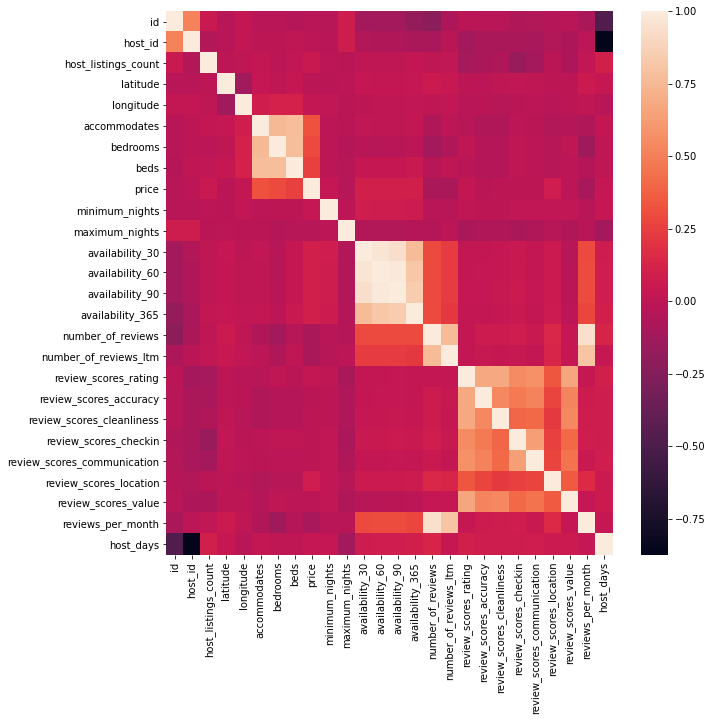

In [42]:
# To keep it simple, I will select numerical features + room_type
df_cropped = df[df.select_dtypes(include=["float64","int64"]).drop(["level_0", "index"],1).columns.to_list()]

corr = df_cropped.head(10000).corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr)

-As we can see in the heatmap, price is  realted with beds, bedrooms and accomodate. Except those features, I add 
room_type as categorial and add another features because I think they might be related.


In [43]:
predictors = ["accommodates", "bedrooms", "beds",  "minimum_nights",  "maximum_nights",  "number_of_reviews", "review_scores_rating", "host_days" , "reviews_per_month", "room_type"]
target = ["price"]
alpha = 0.05

In [44]:
significant_variables = variable_selection(df, predictors, target, alpha)

['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'host_days', 'reviews_per_month', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']


In [45]:
significant_variables

['accommodates',
 'bedrooms',
 'minimum_nights',
 'review_scores_rating',
 'reviews_per_month',
 'room_type_Private room']

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [46]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):
    """
    build a recommendation system. take min and max budgets and also take relative value which means if it is true
    
    take a fraction and then find neighbourhood with most fraction. If it is false, find the neighbourhood with
    
    most properties in specified price index.

    Returns:
        recommended neighbourhood name
    """
    if relative == False: # if relative false take real values
        dic = df[(df.price <= budget_max) & (df.price >= budget_min)][["neighbourhood_cleansed"]].value_counts().to_dict() # filter df and take neighbourhood_cleansed find frequency and make it dict
        v=list(dic.values()) # all values
        k=list(dic.keys()) # all keys

        neighbourhood = k[v.index(max(v))]
        return neighbourhood[0]
    else:  # if relative  =  true take fraction
        dic1 = df[["neighbourhood_cleansed"]].value_counts().to_dict()
        dic2 = df[(df.price <= budget_max) & (df.price >= budget_min)][["neighbourhood_cleansed"]].value_counts().to_dict() # filter df and take neighbourhood_cleansed find frequency and make it dict

        for key, value in dic2.items():  # find fractions
          fraction = value / dic1[key]  # values with filter / values without filter
          dic2[key] = fraction # change values

        v=list(dic2.values()) # all values
        k=list(dic2.keys()) # all keys
        neighbourhood = k[v.index(max(v))]
        return neighbourhood[0]

In [47]:
recommend_neighbourhood(df, 100.0, 300.0, True)

'Oud-Oost'

### Price recommender for hosts

In [48]:
def recommend_price(df, latitude, longitude, n_neighbours, room_type = None):
    """
    make a recommendation system to determine the price of property. Take the location values and 
    
    n_neighbours value which is important because based on it, we will find an average value.
    
    find Euclidean distance in terms of latitude/longitude of all properties between given latitude/longitude values as
    
    parameters. Sort them, take neares "n_neighbours" values and find mean

    Returns:
        recommended average price
    """

    df_reco = df[["room_type", "price", "latitude" ,"longitude"]] # create df_reco dataset

    df_reco["distance"] = ((df_reco.latitude-latitude)**2 + (df_reco.longitude-longitude)**2)**(1/2) # create new column and calculate distance

    if room_type in df_reco.room_type.unique():   # if room_type variable is in room_type.uniique
        df_reco = df_reco[df_reco.room_type == room_type] # filter df_reco

    avg_price = df_reco.sort_values('distance', ascending = True).head(n_neighbours).price.mean() #sort values based of distance take take top n_neighbours of raw and take mean
  
  
    return avg_price

In [49]:
recommend_price(df, 52.37297, 4.88339, 10, 'Entire home/apt')

299.6

In [50]:
recommend_price(df, 52.36609, 4.91143, 7)

175.0